# Notebook on the dynamics of the creation and disappearance of links

This notebook will try to analyze recently created links (less than one year) based on data from facebook gathered as part of the algopol investigation.

## What I can do (at the moment)

1. Compute and Identify recent alters for an ego
1. Compute and plot frequencies and percentages of recent alters for a given ego
1. Compute and plot the proportion of recent alters per year for a given ego


## What I can't do (at the moment)


1. Compute and plot proportions against a given socio-economical category or a demographic profile.
1. Compute, label and plot against specific reasons. I don't have the "why" of an interaction.
1. Compute lost alters (unfriend, blocks)

## What I need 

1. Egos Age
1. Alters Age
1. The reason behind the interaction
1. An union of all the egos to compute and plot the mean and median number of recent alters for the whole dataset
1. An union of all the egos (in a specific and relevant category) to compute and plot the mean and median number of recent alters for a specific category.

## Computing the recent alter distribution

### Without Pandas (except for plotting)

In [1]:
from link_dynamics_func import *
sns.set()


In [2]:
recent_freq_percDF = recent_alters_freq_perc_df('../sample_data_recent_alter_csv/csv')

## Recent Links

### Distribution of recent ties in average

#### Linear Scale

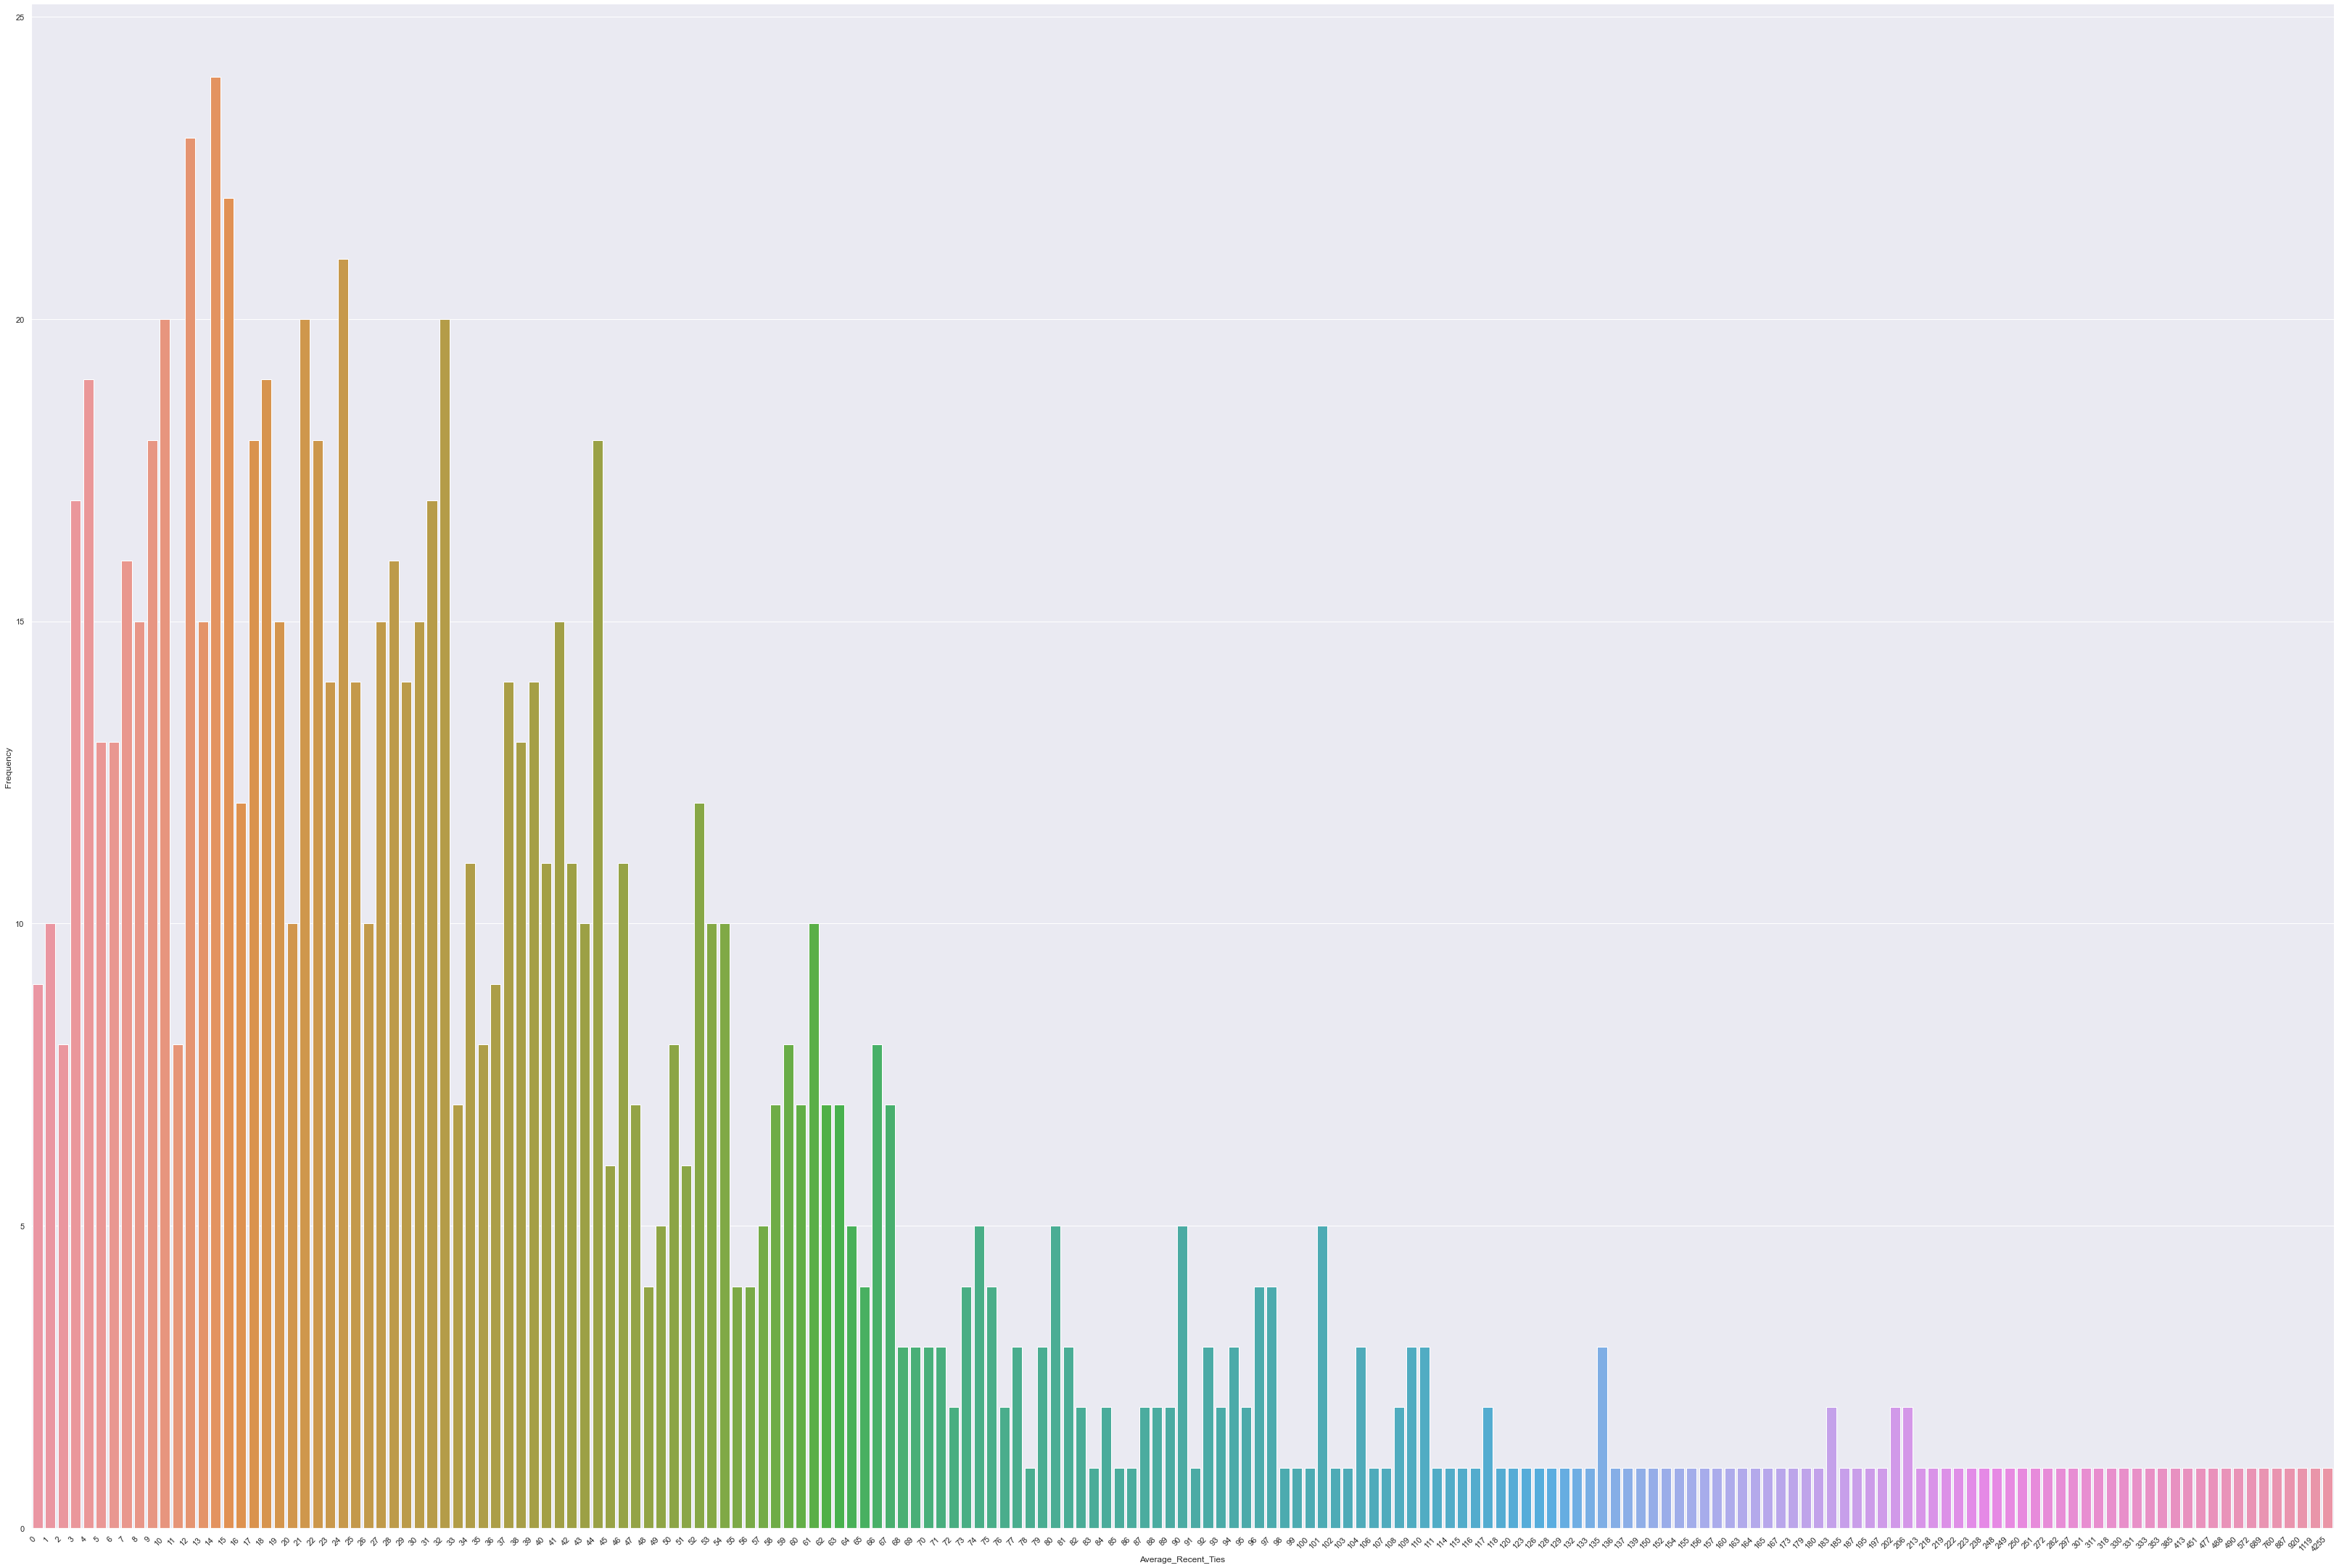

In [3]:
g = sns.catplot(x="Average_Recent_Ties", y="Frequency",data=recent_freq_percDF, kind="bar", height=30, aspect=30/20)
g = g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha="right")

#### Logarithmic Scale

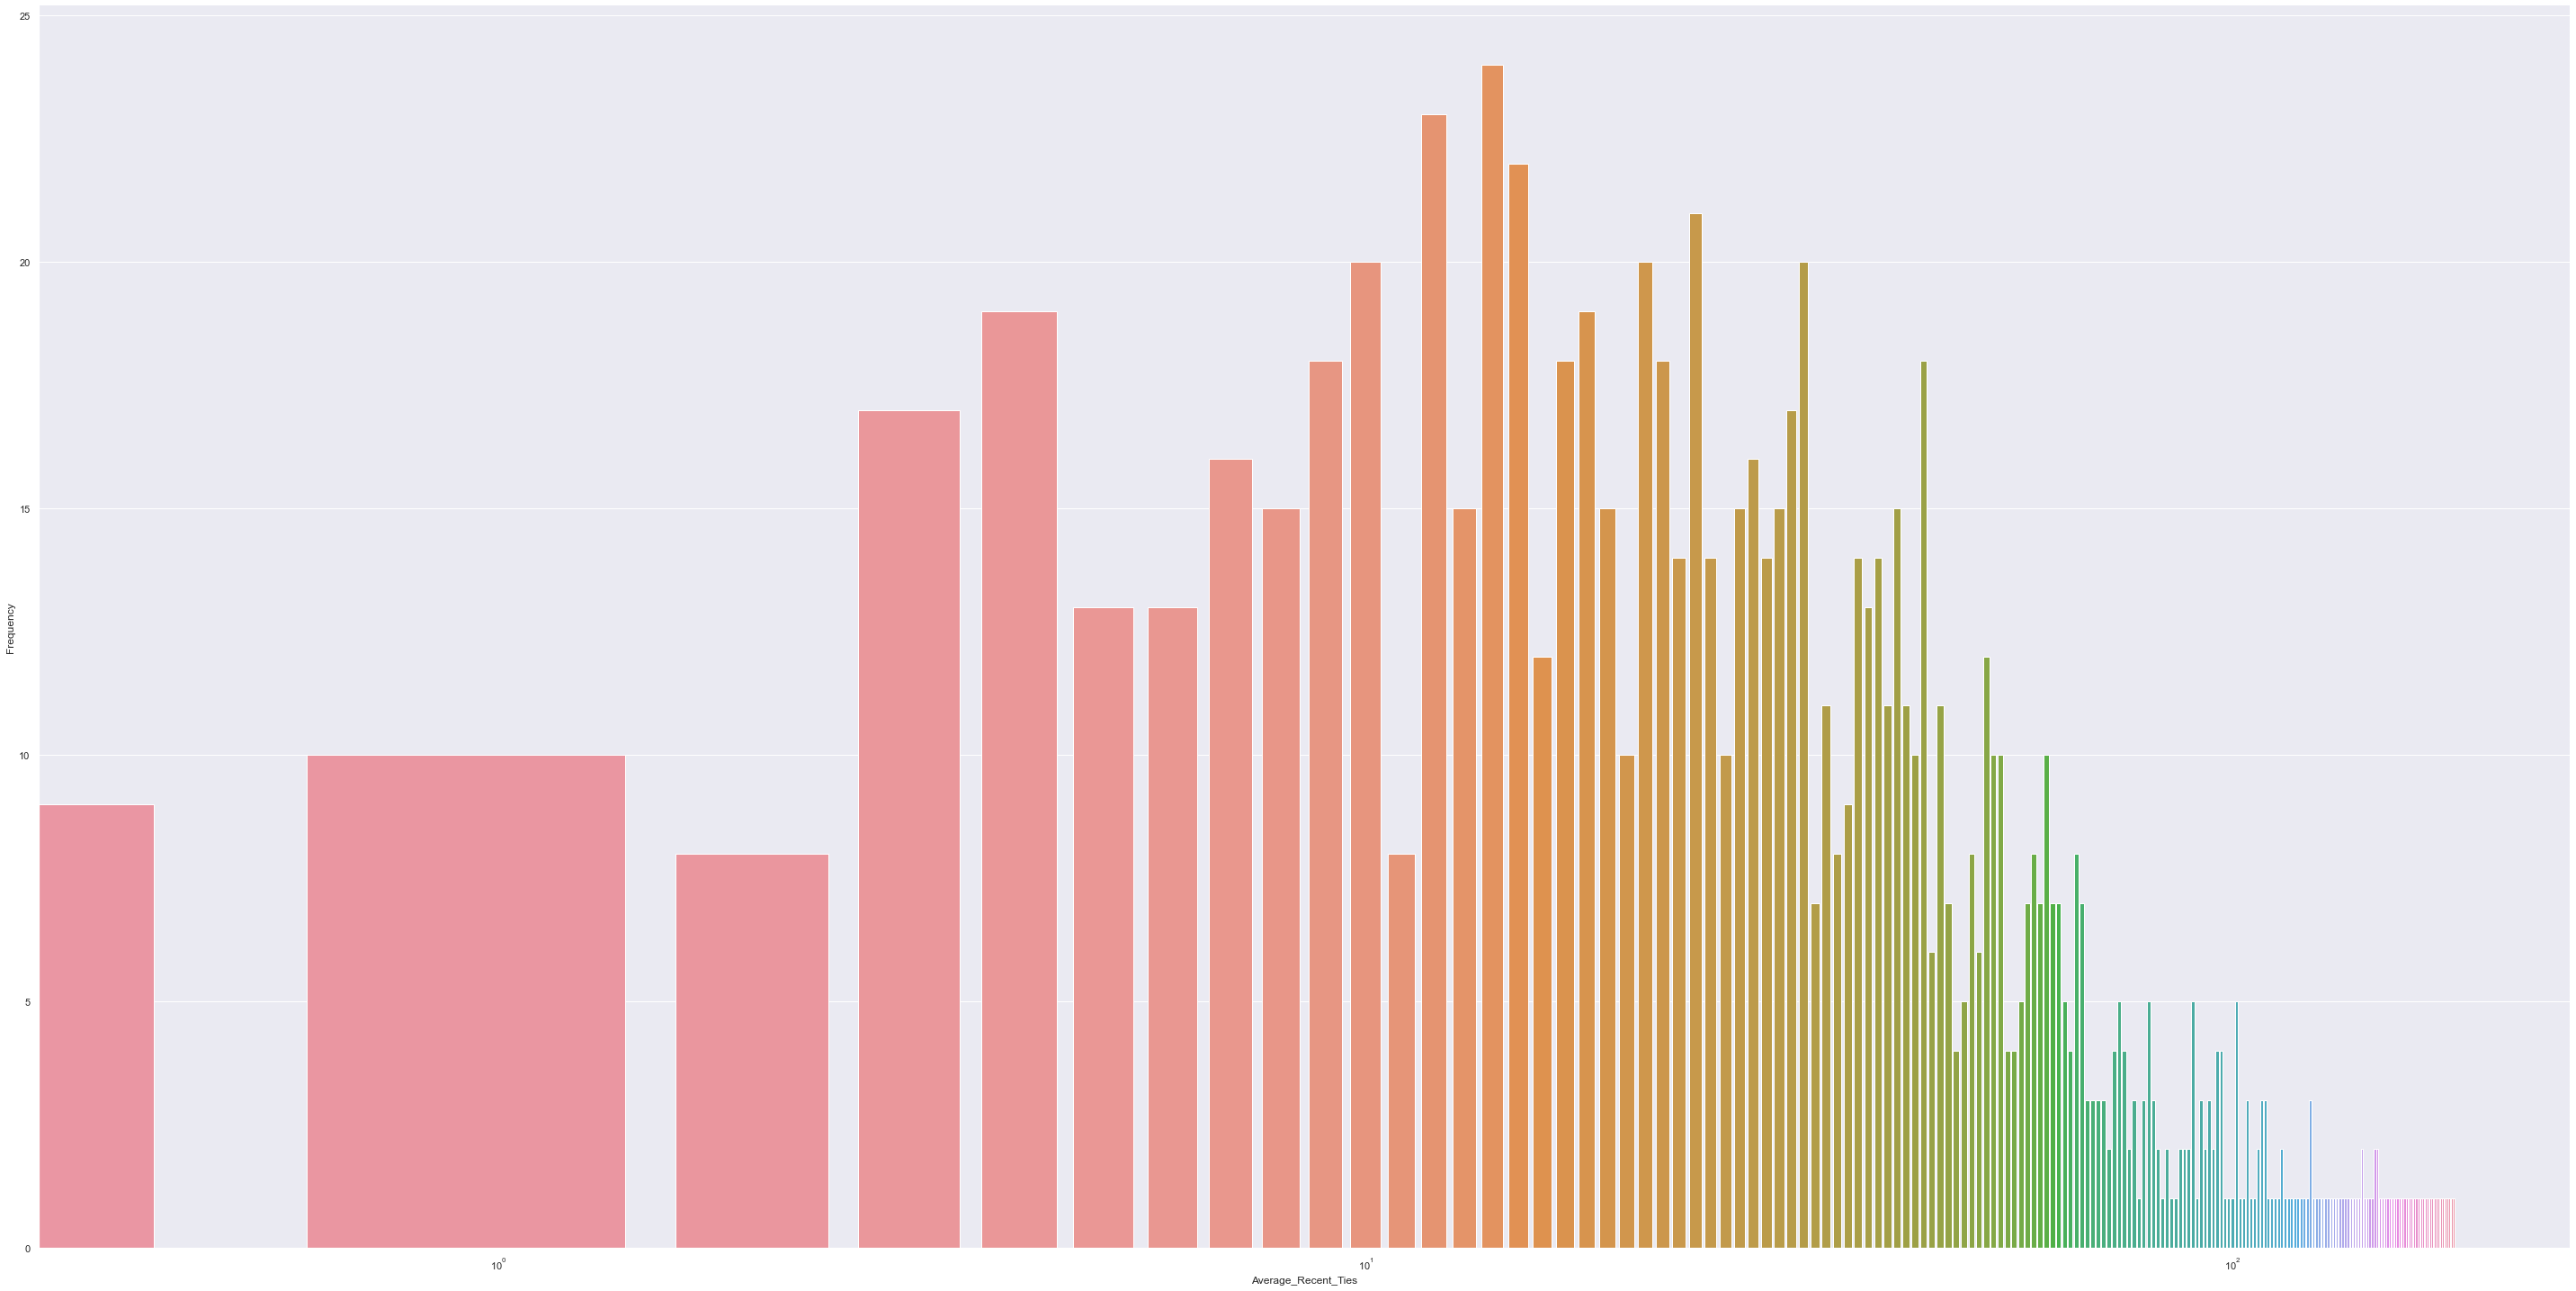

In [4]:
g = sns.catplot(x="Average_Recent_Ties", y="Frequency",data=recent_freq_percDF, kind="bar", height=20, aspect=40/20)
g = g.set(xscale='log')

### Proportion of recent relationships for categories of age

In [5]:
df_recent = all_recent_alters_csv_to_df('../sample_data_recent_alter_csv/csv/*.csv')
df_socio_cat = age_gender_profession_csv_to_df('../sample_data_egos_age/egos-age-gender-profession.csv')
df_merged = merged_df(df_recent,df_socio_cat)
df_mean_age_binned = mean_age_df_binned(df_merged)
df_mean_age = mean_age_df(df_merged)
df_median_age_binned = median_age_binned(df_merged)
df_median_age = median_age_df(df_merged)

#### Average Age per Ego Plot

In [6]:
df_mean_age.sort_values(by="Mean_Alter_Count")

,egos,age,Mean_Alter_Count
247,0563906a,34.0,0.000000
632,0db6bee1,22.0,0.000000
716,0f245ab4,54.0,0.000000
718,0f3df5c9,18.0,0.000000
342,078be551,25.0,0.000000
...,...,...,...
378,0858e02d,16.0,759.761905
23,00648104,22.0,886.941176
27,0083df94,55.0,920.254545
647,0de3a0ac,21.0,1118.770492


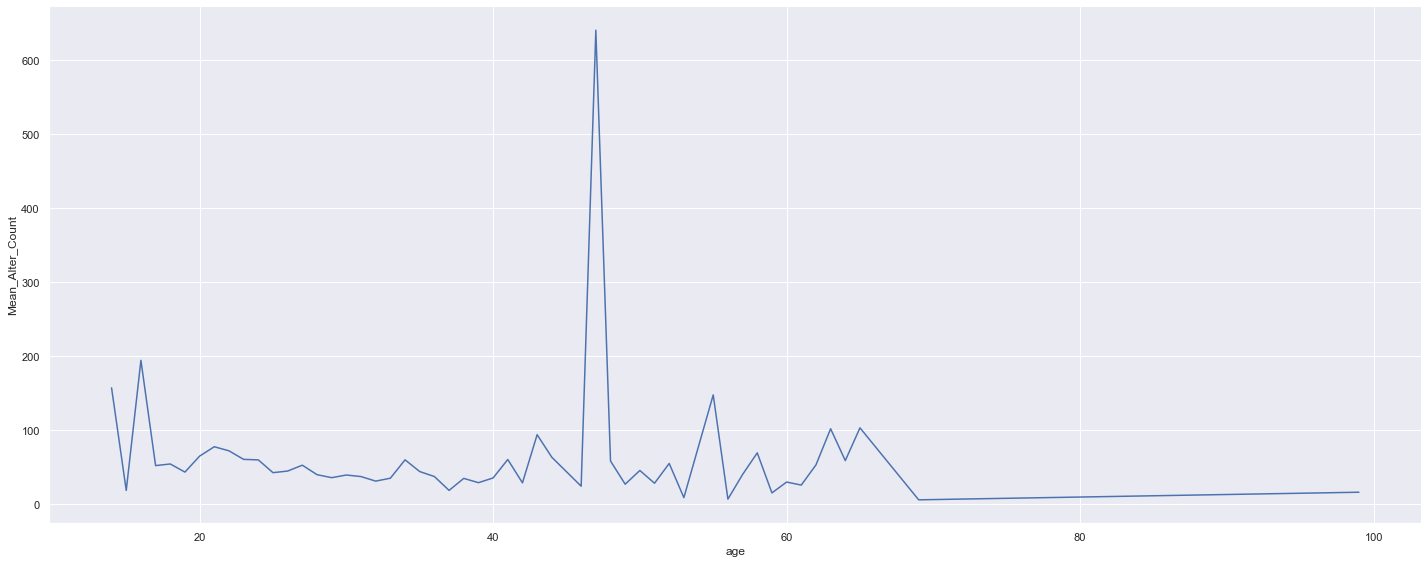

In [7]:
g = sns.relplot(x='age',y='Mean_Alter_Count',data=df_mean_age,kind='line',ci=None,height=8,aspect=20/8)

#### Median Age per Ego Plot

In [8]:
df_median_age.sort_values(by="Median_Alter_Count")

,egos,age,Median_Alter_Count
641,0dcd2b7f,22.0,0.0
247,0563906a,34.0,0.0
716,0f245ab4,54.0,0.0
705,0f0eae95,34.0,0.0
220,04cf8f5d,63.0,0.0
...,...,...,...
695,0ee48e92,63.0,331.0
147,0310aaef,34.0,334.0
474,0a2a82b3,24.0,653.0
27,0083df94,55.0,1113.0


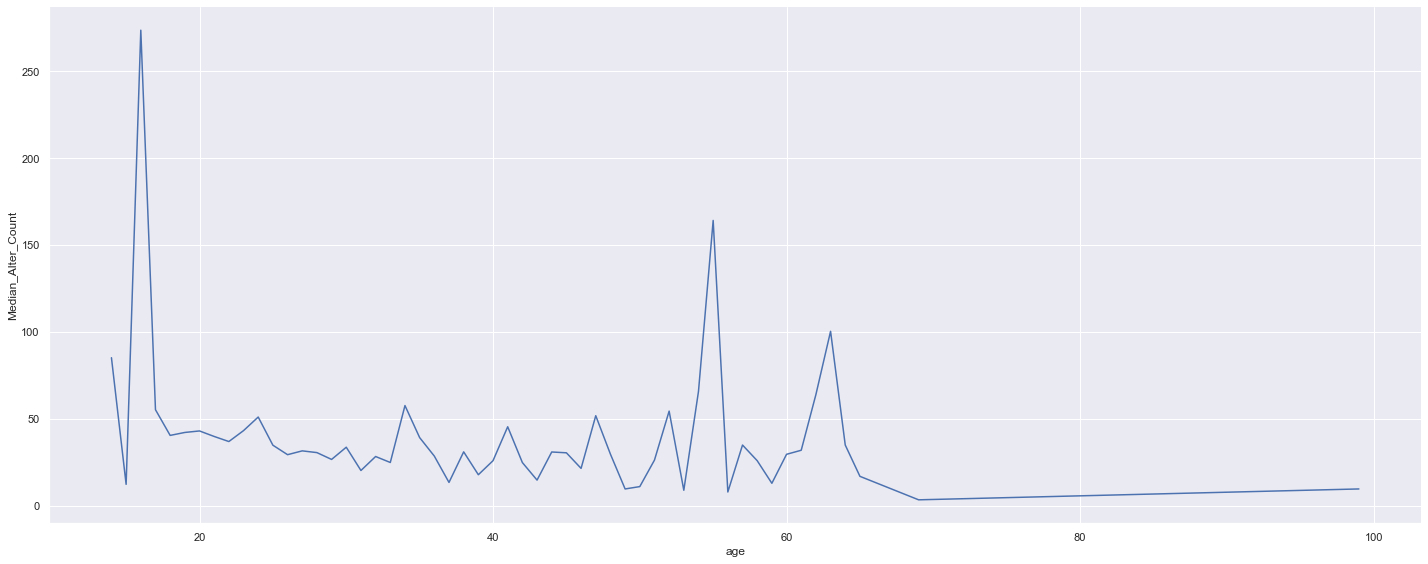

In [9]:
g = sns.relplot(x='age',y='Median_Alter_Count',data=df_median_age,kind='line',ci=None,height=8,aspect=20/8)

#### Binned Average Age Plot

In [10]:
df_mean_age_binned.style.hide_index()

age_range,Mean_Alter_Count,egos,age_range_str
"(0, 18]",75.361901,49,"(0, 18]"
"(18, 30]",56.334754,454,"(18, 30]"
"(30, 59]",63.896013,233,"(30, 59]"
"(59, 75]",57.474917,14,"(59, 75]"
"(75, 100]",16.283273,2,"(75, 100]"


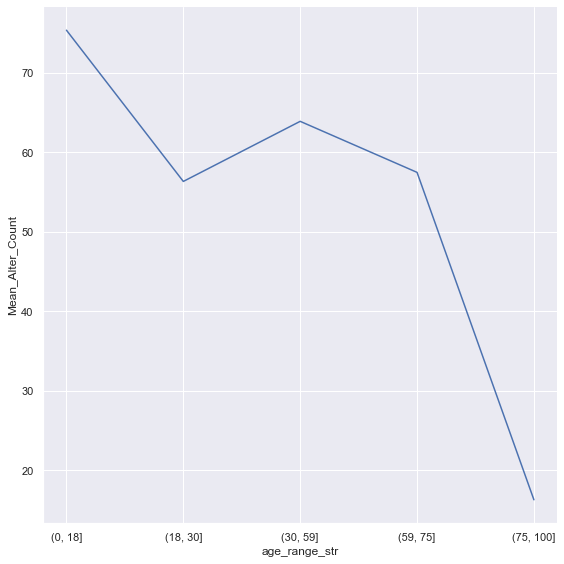

In [11]:
g = sns.relplot(x='age_range_str',y='Mean_Alter_Count',data=df_mean_age_binned,kind='line',height=8)

#### Binned Median Age Plan

In [12]:
df_median_age_binned.style.hide_index()

age_range,Median_Alter_Count,egos,age_range_str
"(0, 18]",41.000000,49,"(0, 18]"
"(18, 30]",32.000000,454,"(18, 30]"
"(30, 59]",19.000000,233,"(30, 59]"
"(59, 75]",24.500000,14,"(59, 75]"
"(75, 100]",9.750000,2,"(75, 100]"


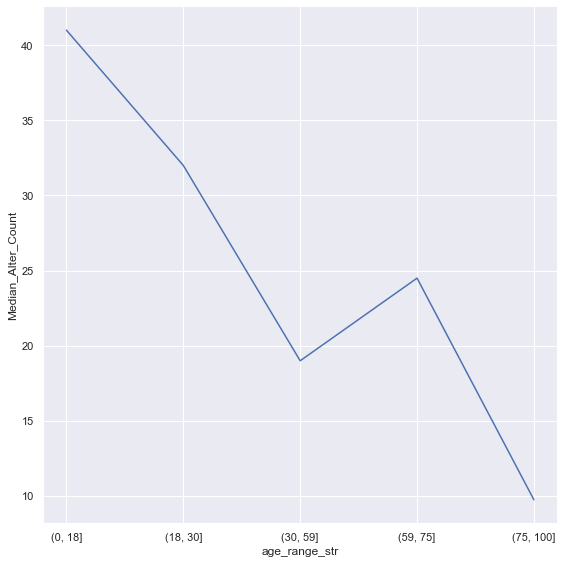

In [13]:
g = sns.relplot(x='age_range_str',y='Median_Alter_Count',data=df_median_age_binned,kind='line',height=8)

### Proportion of recent relationships per gender 

#### Average recents relationships per gender

In [32]:
df_mean_gender = mean_gender_df(df_merged)
df_mean_gender

,gender,Mean_Alter_Count,egos
0,1.0,61.708142,534
1,2.0,55.236466,218


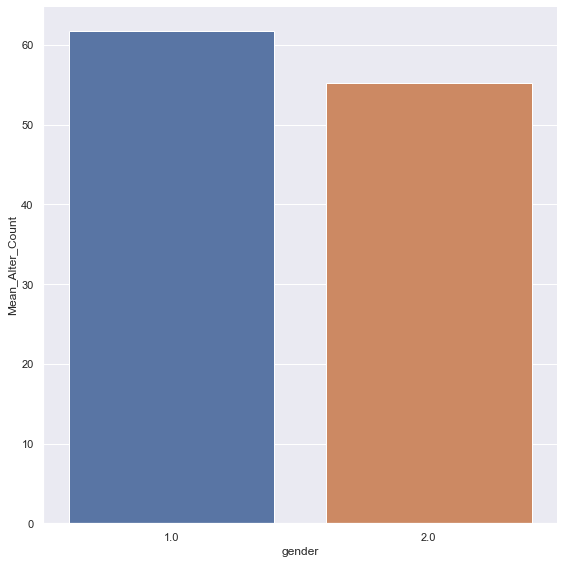

In [30]:
g = sns.catplot(x="gender", y="Mean_Alter_Count",data=df_mean_gender, kind="bar",height=8)

#### Median Recent Relationships per gender

In [33]:
df_median_gender = median_gender_df(df_merged)
df_median_gender

,gender,Median_Alter_Count,egos
0,1.0,26.75,534
1,2.0,31.00,218


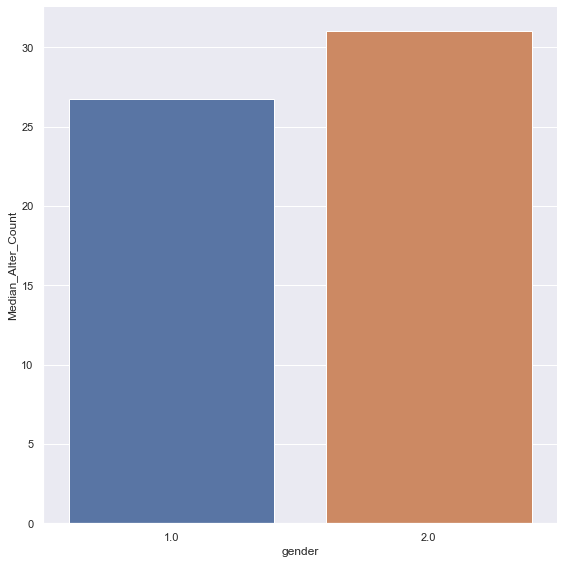

In [31]:
g = sns.catplot(x="gender", y="Median_Alter_Count",data=df_median_gender, kind="bar",height=8)

### Proportion of recent relationships per professions

#### Average recents relationships per professions

In [35]:
df_mean_profession = mean_professions(df_merged)
df_mean_profession

,profession,Mean_Alter_Count,egos
0,1.0,14.434831,3
1,2.0,57.423129,6
2,3.0,25.950820,1
3,4.0,82.337002,15
4,5.0,62.528816,33
5,6.0,38.584864,87
6,7.0,72.869911,102
7,8.0,60.818466,28
8,9.0,91.883599,12
9,10.0,57.205883,23


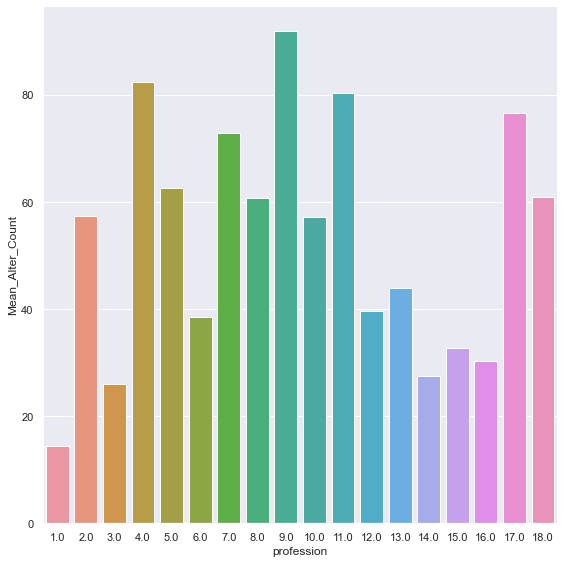

In [19]:
g = sns.catplot(x="profession", y="Mean_Alter_Count",data=df_mean_profession, kind="bar",height=8)

#### Median recents relationships per professions

In [36]:
df_median_profession = median_professions(df_merged)
df_median_profession

,profession,Median_Alter_Count,egos
0,1.0,12.00,3
1,2.0,29.50,6
2,3.0,32.00,1
3,4.0,30.00,15
4,5.0,36.00,33
5,6.0,22.00,87
6,7.0,18.00,102
7,8.0,17.50,28
8,9.0,39.00,12
9,10.0,23.50,23


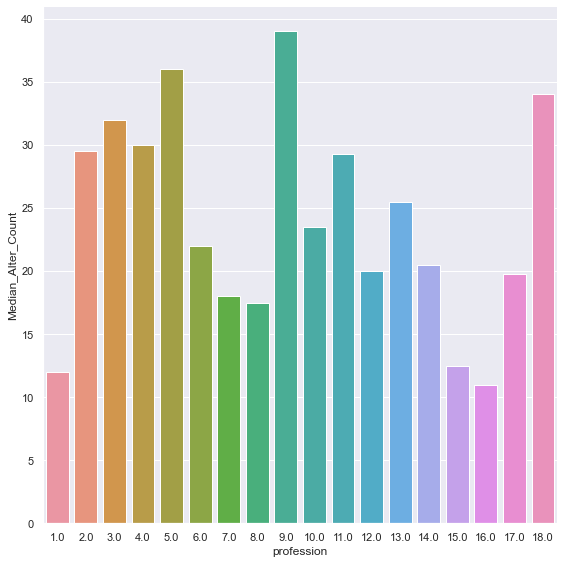

In [26]:
g = sns.catplot(x="profession", y="Median_Alter_Count",data=df_median_profession, kind="bar",height=8)

## LOST TIES
## RENEWAL OF LINKS